In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#initial_libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import random
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from math import radians, sin, cos, asin, sqrt
import folium

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

## EDA

In [ ]:
#initial_data = pd.read_csv('/Users/georgekorenkov/Downloads/Dublin_20_11_with_description.zip', compression='zip')

#initial_data = pd.read_csv('/Users/georgekorenkov/Downloads/Dublin_30_11_with_description.zip', compression='zip')
initial_data = pd.read_csv('/content/drive/MyDrive/Daft/Dublin_30_11_with_description.zip', compression='zip')
initial_data.info()

<ipython-input-4-5b554e6968c8>:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_data = pd.read_csv('/content/drive/MyDrive/Daft/Dublin_30_11_with_description.zip', compression='zip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39536 non-null  float64
 1   id                     63196 non-null  int64  
 2   title                  63196 non-null  object 
 3   seoTitle               63196 non-null  object 
 4   sections               63196 non-null  object 
 5   saleType               63196 non-null  object 
 6   featuredLevel          63196 non-null  object 
 7   featuredLevelFull      63196 non-null  object 
 8   publishDate            63196 non-null  object 
 9   price                  63196 non-null  object 
 10  abbreviatedPrice       63196 non-null  object 
 11  numBedrooms            41312 non-null  object 
 12  propertyType           63194 non-null  object 
 13  daftShortcode          63196 non-null  int64  
 14  seller                 63196 non-null  object 
 15  da

In [ ]:
initial_data['publishDate'] = pd.to_datetime(initial_data['publishDate'],format = "%Y-%m-%d %H:%M:%S",exact=False)

In [ ]:
initial_data = initial_data.drop_duplicates(subset=['id'], keep='first')
initial_data

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",['To Let'],STANDARD,STANDARD,2023-02-13 03:40:47,€350 per week,...,NaN,1 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development Get ready to level up your lifesty...
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",['For Sale'],FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,NaN,2 Bath,"{'unit': 'METRES_SQUARED', 'value': '113'}",113 m²,NaN,NaN,NaN,NaN,NaN,Development Please check out our new website a...
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",['To Let'],PREMIUM,PREMIUM,2024-02-07 16:01:58,"From €4,000 per month",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development **** Stunning Development of Newly...
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",['For Sale'],STANDARD,STANDARD,2024-02-08 16:29:58,"€330,000",...,NaN,1 Bath,"{'unit': 'METRES_SQUARED', 'value': '68'}",68 m²,NaN,NaN,NaN,NaN,NaN,Development Experience a better kind of rentin...
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",['For Sale'],STANDARD,STANDARD,2024-02-19 09:21:29,"€3,950,000",...,NaN,5 Bath,"{'unit': 'METRES_SQUARED', 'value': '508'}",508 m²,NaN,NaN,NaN,NaN,NaN,Development Looking for a place where luxury m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63180,NaN,5936806,"Richmond Cottages North,Dublin 1, Ballybough, ...","Richmond Cottages North,Dublin 1, Ballybough, ...","['Property', 'Residential', 'House']",['To Let'],STANDARD,STANDARD,2024-11-30 14:21:48,"€2,288 per month",...,NaN,3 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3-Bedroom, 3-Bathroom House for Rent\n\n*Apply..."
63183,NaN,5932320,"Jalna, 15 Kilbarrack Road, Dublin 5, Kilbarrac...","Jalna, 15 Kilbarrack Road, Dublin 5, Kilbarrac...","['Property', 'Residential', 'House']",['To Let'],STANDARD,STANDARD,2024-11-30 14:24:07,"€3,145 per month",...,NaN,1 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available immediately a beautifully presented ...
63185,NaN,5932549,"The Forum,Ballymoss Road,Sandyford Business Pa...","The Forum,Ballymoss Road,Sandyford Business Pa...","['Property', 'Sharing', 'Apartment']",['To Let'],PREMIUM,PREMIUM,2024-11-30 14:30:54,"€1,025 per month",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long Term Accommodation Available for in Sandy...
63188,NaN,5933957,"34 Upper Main Street, Rush, Co. Dublin","34 Upper Main Street, Rush, Co. Dublin","['Property', 'Residential', 'Apartment']",['To Let'],STANDARD,STANDARD,2024-11-30 14:33:23,"€2,000 per month",...,NaN,2 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AVAILABLE FROM 01st JANUARY 2025.\nDNG McKenna...


In [ ]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16479 entries, 0 to 63194
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             13146 non-null  float64       
 1   id                     16479 non-null  int64         
 2   title                  16479 non-null  object        
 3   seoTitle               16479 non-null  object        
 4   sections               16479 non-null  object        
 5   saleType               16479 non-null  object        
 6   featuredLevel          16479 non-null  object        
 7   featuredLevelFull      16479 non-null  object        
 8   publishDate            16479 non-null  datetime64[ns]
 9   price                  16479 non-null  object        
 10  abbreviatedPrice       16479 non-null  object        
 11  numBedrooms            12691 non-null  object        
 12  propertyType           16478 non-null  object        
 13  daftSh

In [ ]:

initial_data1 = initial_data.copy()

In [ ]:
#remove 100% unnecessary columns
#initial_data1 = initial_data1.drop(['seoTitle', 'featuredLevelFull', 'abbreviatedPrice', 'daftShortcode', 'platform', 'seoFriendlyPath', 'pageBranding', 'state', 'premierPartner', 'floorArea', 'newHome'], axis = 1)
#initial_data1

##

In [ ]:
# to set all values in 'saleType' properly
initial_data1['saleType'] = initial_data1['saleType'].mask(initial_data1['saleType'] == "['To Let']", 'To Let')
initial_data1['saleType'] = initial_data1['saleType'].mask(initial_data1['saleType'] == "['For Sale']", 'For Sale')
initial_data1['saleType'].value_counts()

,count
saleType,
To Let,10198
For Sale,6231
"['To Let', 'For Sale']",50


Bedrooms are ranged like Double>Single>Twin>Shared (the most expensive to the cheapest one).
The 'price" values can be like 'From €1,000 to €1,500 per month' for such rooms. The idea is to take the lowest price for the cheapest room and add one more row for the most expensive room with the hightest price.

In [ ]:
# the function find min/max in 'price' and the corresponding 'numBedrooms' (Double>Single>Twin>Shared)
def prices(price_str, bed_str):
  beds_list = {'Double':4,'Single':3,'Twin':2 , 'Shared':1}# rooms rating
  end = ' per month'
  if end not in price_str:
    end = ' per week'
  pr_min = price_str.split(' to ')[0].replace('From ','') + end # min price
  pr_max = price_str.split(' to ')[-1] # max price
  bed_str1 = bed_str.replace(' & ',',').replace(' Room','').replace(' ','').split(',') # divide the string into words corresponding to rooms types
  new_dict = {}
  for key in bed_str1:
    new_dict[key] = beds_list[key] # new dictionary where keys are from the 'numBedrooms' string and values are from rating (Double>Single>Twin>Shared)
  new_dict = dict(sorted(new_dict.items(), key=lambda item: item[1])) # sort the dictionary
  bed_min = list(new_dict.items()) [0][0] + ' Room' # the cheapest
  bed_max = list(new_dict.items()) [-1][0] + ' Room' # the most expensive
  return pr_min, pr_max, bed_min, bed_max

In [ ]:
#to check
prices('From €1,200 to €1,800 per month','Single, Double & Shared Room')

('€1,200 per month', '€1,800 per month', 'Shared Room', 'Double Room')

In [ ]:

df_test = initial_data1[(initial_data1['price'].str.contains(" to ")) & (initial_data1['numBedrooms'].str.contains(" & "))].copy()


In [ ]:
# max 'price', the corresponding 'numBedrooms' (1 and 3 items from the 'prices' function) and 'id' ('_A') in the copied slice
df_test = df_test.assign(price=df_test.apply(lambda row:prices(row['price'],row['numBedrooms'])[1], axis=1),numBedrooms = df_test.apply(lambda row:prices(row['price'],row['numBedrooms'])[3], axis=1),id = df_test['id'].apply(lambda x: str(x) + '_A'))
df_test[['id','price','numBedrooms']]

,id,price,numBedrooms
2254,5876810_A,"€1,375 per month",Single Room
2462,5877556_A,€900 per month,Double Room
2527,5869836_A,"€1,000 per month",Double Room
2546,5878109_A,€790 per month,Double Room
2584,5869787_A,€175 per week,Twin Room
...,...,...,...
62927,5936690_A,€950 per month,Double Room
62929,5936674_A,"€1,150 per month",Double Room
62948,5936606_A,€700 per month,Double Room
63025,5931824_A,€790 per month,Double Room


In [ ]:
# min 'price', the corresponding 'numBedrooms' (0 and 2 items from the 'prices' function)
initial_data1[initial_data1['price'].str.contains(" to ")] = initial_data1[initial_data1['price'].str.contains(" to ")].assign(price=initial_data1[initial_data1['price'].str.contains(" to ")].apply(lambda row:prices(row['price'],row['numBedrooms'])[0], axis=1),numBedrooms = initial_data1[initial_data1['price'].str.contains(" to ")].apply(lambda row:prices(row['price'],row['numBedrooms'])[2], axis=1))

# concat the initial and copied
initial_data1 = pd.concat([initial_data1, df_test], axis=0).reset_index(drop=True)
initial_data1[(initial_data1['id'] == 5911772) |  (initial_data1['id'] == '5911772_A')][['id','price','numBedrooms']]

,id,price,numBedrooms
12953,5911772,"€1,200 per month",Shared Room
16539,5911772_A,"€1,800 per month",Double Room


In [ ]:
# Check rows with "&" and "Rooms" in "numBedrooms" (those with "From" in "price" have been divided already)
initial_data1[(initial_data1['numBedrooms'].str.contains("&", na=False)) & (initial_data1['numBedrooms'].str.contains("oom", na=False))]

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
3146,3155.0,5777046,"Raven Hall, Swords, Swords, Co. Dublin","Raven Hall, Swords, Swords, Co. Dublin","['Property', 'Sharing', 'Apartment']",To Let,STANDARD,STANDARD,2024-10-11 10:36:14,€125 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overall Floor Area: 85 m²1st-floor front and b...
7295,7374.0,5876730,"Batter Lane, Balheary Road, Bealinstown, Sword...","Batter Lane, Balheary Road, Bealinstown, Sword...","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-10-15 10:20:04,€180 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...
9749,16954.0,5891081,"Raven Hall, Swords, Swords, Co. Dublin","Raven Hall, Swords, Swords, Co. Dublin","['Property', 'Sharing', 'Apartment']",To Let,STANDARD,STANDARD,2024-10-21 10:12:45,€125 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 places available for boys €125 per week per ...
14378,NaN,5921984,"3 Clonskeagh Road, Dublin 6, Milltown, Dublin 6","3 Clonskeagh Road, Dublin 6, Milltown, Dublin 6","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-18 13:37:17,€650 per month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rooms for rent in Dublin 6 and Cork City Cente...


In [ ]:
#Keep the cheapest ones in these rows (Double>Single>Twin>Shared)
mask = (initial_data1['numBedrooms'].str.contains("&", na=False)) & (initial_data1['numBedrooms'].str.contains("oom", na=False))
initial_data1[mask] =  initial_data1[mask].assign(numBedrooms = initial_data1[mask].apply(lambda row:prices(row['price'],row['numBedrooms'])[2], axis=1))

In [ ]:
#checking
initial_data1[(initial_data1['id'] == 5777046) |  (initial_data1['id'] == 5876730) |  (initial_data1['id'] == 5891081)]

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
3146,3155.0,5777046,"Raven Hall, Swords, Swords, Co. Dublin","Raven Hall, Swords, Swords, Co. Dublin","['Property', 'Sharing', 'Apartment']",To Let,STANDARD,STANDARD,2024-10-11 10:36:14,€125 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overall Floor Area: 85 m²1st-floor front and b...
7295,7374.0,5876730,"Batter Lane, Balheary Road, Bealinstown, Sword...","Batter Lane, Balheary Road, Bealinstown, Sword...","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-10-15 10:20:04,€180 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...
9749,16954.0,5891081,"Raven Hall, Swords, Swords, Co. Dublin","Raven Hall, Swords, Swords, Co. Dublin","['Property', 'Sharing', 'Apartment']",To Let,STANDARD,STANDARD,2024-10-21 10:12:45,€125 per week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 places available for boys €125 per week per ...


In [ ]:
col_ind = initial_data1.columns.get_loc("numBedrooms")
col_ind

11

In [ ]:
# Add new column "shared_or_not". Equals to 1 for "twin" and "shared"
initial_data1.insert(col_ind + 1, 'shared_or_not', initial_data1.apply(lambda row: 1 if (row['numBedrooms'] == 'Twin Room' or row['numBedrooms'] == 'Shared Room') else 0, axis=1))
initial_data1['shared_or_not'].value_counts()

,count
shared_or_not,
0,16267
1,304


In [ ]:
initial_data1['numBedrooms'].value_counts()

,count
numBedrooms,
2 Bed,2983
Double Room,2554
3 Bed,2468
1 Bed,1358
4 Bed,1233
Single Room,867
5 Bed,397
1 bed,329
Twin Room,188


In [ ]:
# to verify that for Shared, Single, Twin and Double 'propertySize' is none
initial_data1[initial_data1['numBedrooms'].str.contains("oom", na=False)]['propertySize'].value_counts()

,count
propertySize,


For the shared rooms without the 'propertySize' use the following:

*  Shared Room - 6 m²
*  Twin Room - 12 m²
*  Single Room - 10 m²
*  Double Room - 20 m²



In [ ]:
#Transform the 'numBedrooms' column to a uniform appearance (the smallest amount of beds)
x1 = 10 #10 sqm ('propertySize')
x2 = 6 #Bed + shelf ~ 6 sqm ('propertySize')
def beds(bed_str):
  if "oom" in bed_str:
    res = 1
    match bed_str:
      case 'Shared Room':
        prop_res = x2
      case 'Twin Room':
        prop_res = 2 * x2
      case 'Single Room':
        prop_res = x1
      case 'Double Room':
        prop_res =2 * x1
    prop_res = str(prop_res) + ' m²'
  else:
    res = bed_str.split(sep=" ")[0].split(sep=",")[0]
    prop_res = None
  return res,prop_res

In [ ]:
bed_str = 'Double Room'
beds(bed_str)

(1, '20 m²')

In [ ]:
mask = initial_data1['numBedrooms'].str.contains("oom", na=False)
initial_data1[mask] =  initial_data1[mask].assign(propertySize = initial_data1[mask].apply(lambda row:beds(row['numBedrooms'])[1], axis=1),numBedrooms = initial_data1[mask].apply(lambda row:beds(row['numBedrooms'])[0], axis=1))
initial_data1[mask]['propertySize'].value_counts()

,count
propertySize,
20 m²,2554
10 m²,867
12 m²,188
6 m²,116


In [ ]:
# the same as above but for numerical data (like 2, 3 & 5 bed)
mask = initial_data1['numBedrooms'].str.contains("&", na=False)
initial_data1[mask] =  initial_data1[mask].assign(numBedrooms = initial_data1[mask].apply(lambda row:beds(row['numBedrooms'])[0], axis=1))

In [ ]:
#initial_data1['numBedrooms'].value_counts()

In [ ]:
#Remove "Bed" and "bed"
initial_data1['numBedrooms'] = initial_data1['numBedrooms'].str.replace(r'(B|b)ed','', regex = True)

In [ ]:
initial_data1['numBedrooms'] = initial_data1['numBedrooms'].astype('Int64')

In [ ]:
initial_data1['numBedrooms'].value_counts()

,count
numBedrooms,
2,3025
3,2496
1,1755
4,1250
5,399
6,76
7,27
8,12
10,7


In [ ]:
initial_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16571 entries, 0 to 16570
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             13208 non-null  float64       
 1   id                     16571 non-null  object        
 2   title                  16571 non-null  object        
 3   seoTitle               16571 non-null  object        
 4   sections               16571 non-null  object        
 5   saleType               16571 non-null  object        
 6   featuredLevel          16571 non-null  object        
 7   featuredLevelFull      16571 non-null  object        
 8   publishDate            16571 non-null  datetime64[ns]
 9   price                  16571 non-null  object        
 10  abbreviatedPrice       16571 non-null  object        
 11  numBedrooms            9058 non-null   Int64         
 12  shared_or_not          16571 non-null  int64         
 13  p

Adjusting variables inside columns

In [ ]:
# Step 1: Remove the "€" symbol at the beginning of each value in the 'price' column
initial_data1['price'] = initial_data1['price'].str.replace('€', '', regex = True)
initial_data1['price'] = initial_data1['price'].str.replace('From ', '', regex = True)
initial_data1['price'] = initial_data1['price'].str.replace('AMV: ', '', regex = True)
initial_data1

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,NaN,1 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development Get ready to level up your lifesty...
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,NaN,2 Bath,"{'unit': 'METRES_SQUARED', 'value': '113'}",113 m²,NaN,NaN,NaN,NaN,NaN,Development Please check out our new website a...
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,"4,000 per month",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development **** Stunning Development of Newly...
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,"330,000",...,NaN,1 Bath,"{'unit': 'METRES_SQUARED', 'value': '68'}",68 m²,NaN,NaN,NaN,NaN,NaN,Development Experience a better kind of rentin...
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,"3,950,000",...,NaN,5 Bath,"{'unit': 'METRES_SQUARED', 'value': '508'}",508 m²,NaN,NaN,NaN,NaN,NaN,Development Looking for a place where luxury m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,NaN,5936690_A,"28 Fitzwilliam Lane, Dublin 2","28 Fitzwilliam Lane, Dublin 2","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:41:24,950 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,FLEXIBLE SHORT STAY available for 1 - 4 months...
16567,NaN,5936674_A,"Castaheany,Dublin 15, Clonee, Dublin 15","Castaheany,Dublin 15, Clonee, Dublin 15","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:45:24,"1,150 per month",...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,A Beautifully presented modern house. \n\nPrim...
16568,NaN,5936606_A,"9 Beechpark Avenue, Dublin 5, Kilmore, Dublin 5","9 Beechpark Avenue, Dublin 5, Kilmore, Dublin 5","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:58:30,700 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,"available double room for 700 euro, and single..."
16569,NaN,5931824_A,"ashington dale, Ashington, Dublin 7","ashington dale, Ashington, Dublin 7","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 11:07:40,790 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,"FEMALES ONLY - Non smoking, non vaping tenants..."


In [ ]:
initial_data1['price'] = initial_data1['price'].str.replace(',', '')
initial_data1

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,NaN,1 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development Get ready to level up your lifesty...
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,NaN,2 Bath,"{'unit': 'METRES_SQUARED', 'value': '113'}",113 m²,NaN,NaN,NaN,NaN,NaN,Development Please check out our new website a...
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,4000 per month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development **** Stunning Development of Newly...
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,330000,...,NaN,1 Bath,"{'unit': 'METRES_SQUARED', 'value': '68'}",68 m²,NaN,NaN,NaN,NaN,NaN,Development Experience a better kind of rentin...
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,3950000,...,NaN,5 Bath,"{'unit': 'METRES_SQUARED', 'value': '508'}",508 m²,NaN,NaN,NaN,NaN,NaN,Development Looking for a place where luxury m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,NaN,5936690_A,"28 Fitzwilliam Lane, Dublin 2","28 Fitzwilliam Lane, Dublin 2","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:41:24,950 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,FLEXIBLE SHORT STAY available for 1 - 4 months...
16567,NaN,5936674_A,"Castaheany,Dublin 15, Clonee, Dublin 15","Castaheany,Dublin 15, Clonee, Dublin 15","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:45:24,1150 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,A Beautifully presented modern house. \n\nPrim...
16568,NaN,5936606_A,"9 Beechpark Avenue, Dublin 5, Kilmore, Dublin 5","9 Beechpark Avenue, Dublin 5, Kilmore, Dublin 5","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 10:58:30,700 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,"available double room for 700 euro, and single..."
16569,NaN,5931824_A,"ashington dale, Ashington, Dublin 7","ashington dale, Ashington, Dublin 7","['Property', 'Sharing', 'House']",To Let,STANDARD,STANDARD,2024-11-30 11:07:40,790 per month,...,NaN,NaN,NaN,20 m²,NaN,NaN,NaN,NaN,NaN,"FEMALES ONLY - Non smoking, non vaping tenants..."


In [ ]:
initial_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16571 entries, 0 to 16570
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             13208 non-null  float64       
 1   id                     16571 non-null  object        
 2   title                  16571 non-null  object        
 3   seoTitle               16571 non-null  object        
 4   sections               16571 non-null  object        
 5   saleType               16571 non-null  object        
 6   featuredLevel          16571 non-null  object        
 7   featuredLevelFull      16571 non-null  object        
 8   publishDate            16571 non-null  datetime64[ns]
 9   price                  16571 non-null  object        
 10  abbreviatedPrice       16571 non-null  object        
 11  numBedrooms            9058 non-null   Int64         
 12  shared_or_not          16571 non-null  int64         
 13  p

In [ ]:
initial_data2 = initial_data1[initial_data1['saleType'] == "['To Let', 'For Sale']" ].copy() # copy
# change the values in the copied sample (index, leave 'For Sale' and the second part gets into the price)
initial_data2 = initial_data2.assign(
    saleType=initial_data2['saleType'].apply(lambda x: eval(x)[1]),
    price=initial_data2['price'].apply(lambda x: x.split(' or ')[0]),
    id = initial_data2['id'].apply(lambda x: str(x) + '_A'))
# change the values in the initial dataframe in the selection (leave 'To Let' and the first part gets into the price)
initial_data1[initial_data1['saleType'] == "['To Let', 'For Sale']" ] = initial_data1[initial_data1['saleType'] == "['To Let', 'For Sale']" ].assign(
    saleType=initial_data1[initial_data1['saleType'] == "['To Let', 'For Sale']" ]['saleType'].apply(lambda x: eval(x)[0]),
    price=initial_data1[initial_data1['saleType'] == "['To Let', 'For Sale']" ]['price'].apply(lambda x: x.split(' or ')[1]))

# add the copied selection to the initial one (reindex it)
initial_data1 = pd.concat([initial_data1, initial_data2], axis=0).reset_index(drop=True)
initial_data1.tail(2)

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,NaN,NaN,"{'unit': 'METRES_SQUARED', 'value': '80'}",80 m²,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...
16620,NaN,5499549_A,"44 Main Street, Finglas, Dublin 11","44 Main Street, Finglas, Dublin 11","['Property', 'Commercial', 'Retail Unit']",For Sale,STANDARD,STANDARD,2024-11-20 19:24:31,450000,...,NaN,NaN,"{'unit': 'METRES_SQUARED', 'value': '134'}",134 m²,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...


In [ ]:
# to check
initial_data1[(initial_data1['id'] == 5910089) |  (initial_data1['id'] == '5910089_A')]

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sticker,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description
12979,38150.0,5910089,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",To Let,STANDARD,STANDARD,2024-11-08 23:26:11,30000 per year,...,NaN,NaN,"{'unit': 'METRES_SQUARED', 'value': '80'}",80 m²,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,NaN,NaN,"{'unit': 'METRES_SQUARED', 'value': '80'}",80 m²,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...


Modify the 'price' data - recalculate to 'per month' for ones with 'To let'


In [ ]:
def price_per_month(pr_str):
  value_per_month = pr_str
  match1 = re.search(r'(\d+?)\s*per\s*week', pr_str)
  match2 = re.search(r'(\d+?)\s*per\s*year', pr_str)
  match3 = re.search(r'(\d+?)\s*per\s*month', pr_str)
  if match1:
        value_per_week = int(match1.group(1))
        value_per_month = value_per_week / 7 * 30
  elif match2:
        value_per_year = int(match2.group(1))
        value_per_month = value_per_year / 365 * 30
  elif match3:
        value_per_month = int(match3.group(1))
  return value_per_month
initial_data1['cleaned_price_per_month'] = initial_data1['price'].apply(price_per_month)
initial_data1

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,numBathrooms,floorArea,propertySize,offers,newHome,priceHistory,propertyTypeExtraInfo,label,description,cleaned_price_per_month
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,1 Bath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development Get ready to level up your lifesty...,1500.0
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,2 Bath,"{'unit': 'METRES_SQUARED', 'value': '113'}",113 m²,NaN,NaN,NaN,NaN,NaN,Development Please check out our new website a...,Price on Application
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,4000 per month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Development **** Stunning Development of Newly...,4000
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,330000,...,1 Bath,"{'unit': 'METRES_SQUARED', 'value': '68'}",68 m²,NaN,NaN,NaN,NaN,NaN,Development Experience a better kind of rentin...,330000
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,3950000,...,5 Bath,"{'unit': 'METRES_SQUARED', 'value': '508'}",508 m²,NaN,NaN,NaN,NaN,NaN,Development Looking for a place where luxury m...,3950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,21583.0,5894389_A,"Unit B1, Stadium Business Park, Ballycoolin Ro...","Unit B1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,NaN,"{'unit': 'METRES_SQUARED', 'value': '1475'}",1475 m²,NaN,NaN,NaN,NaN,NaN,Overall Floor Area: 1475 m²Location\n\nStadium...,Price on Application
16617,21580.0,5894812_A,"Unit C1, Stadium Business Park, Ballycoolin Ro...","Unit C1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,NaN,"{'unit': 'METRES_SQUARED', 'value': '1767'}",1767 m²,NaN,NaN,NaN,NaN,NaN,Overall Floor Area: 1767 m²Location\n\nStadium...,Price on Application
16618,22386.0,5891121_A,"Goldcrest House, Dublin Airport Logistics Park...","Goldcrest House, Dublin Airport Logistics Park...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 17:03:17,Price on Application,...,NaN,"{'unit': 'METRES_SQUARED', 'value': '5346'}",5346 m²,NaN,NaN,NaN,NaN,NaN,Overall Floor Area: 5346 m²High-Bay Warehouse ...,Price on Application
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,NaN,"{'unit': 'METRES_SQUARED', 'value': '80'}",80 m²,NaN,NaN,NaN,NaN,NaN,Sale Type: For Sale by Private TreatyOverall F...,345000


In [ ]:
#initial_data1['cleaned_price_per_month'].value_counts()

The 'sections" columns has to be divided

In [ ]:
sections_value_counts = initial_data1['sections'].value_counts()
print(sections_value_counts)

sections
['Property', 'Residential', 'Apartment']                        3613
['Property', 'Sharing', 'House']                                2486
['Property', 'Commercial', 'Office Space']                      1742
['Property', 'Residential', 'House', 'Semi-Detached House']     1351
['Property', 'Sharing', 'Apartment']                            1157
['Property', 'Residential', 'House', 'Terraced House']          1116
['Property', 'Residential', 'House']                             892
['Property', 'Residential', 'House', 'Detached House']           632
['Property', 'Commercial', 'Industrial Unit']                    483
['Property', 'Residential', 'House', 'End of Terrace House']     469
['Property', 'Commercial', 'Serviced Office']                    417
['Property', 'Commercial', 'Retail Unit']                        409
['Property', 'Residential', 'Studio Apartment']                  302
['Property', 'Commercial', 'Investment Property']                227
['Property', 'Parking', '

In [ ]:
# Define the max number of new columns
max_sections = initial_data1['sections'].apply(lambda x: len(eval(x))).max()
max_sections

4

In [ ]:
# This function not only divided the list by elements but swaps the first elements if the first is not 'Property' and the second is 'Property'
def sections_repl(section_str, i):
  section_str = eval(section_str)
  if section_str[0] != 'Property' and section_str[1] == 'Property' :
    section_str[0], section_str[1] = section_str[1], section_str[0]
  if len(section_str) > i:
    return section_str[i]
  else:
    return ""

In [ ]:
for i in range(max_sections):
  initial_data1['sections_' + str(i)] = initial_data1['sections'].apply(lambda row: sections_repl(row, i))
initial_data1['sections_0'].value_counts()

,count
sections_0,
Property,16621


In [ ]:
#initial_data1['sections_1'].value_counts()

In [ ]:
#initial_data1['sections_2'].value_counts()

In [ ]:
#initial_data1['sections_3'].value_counts()

It was checked that data in 'sections_i' are different.
For example, ['Property', 'Commercial', 'Commercial Site'] or  ['Property', 'Holiday Homes', 'Holiday Home']

Spheric distance

In [ ]:
earth_r = 6371 # earth radius in km
def sph_dist (latitude,longitude,lat_point,long_point):
  dl = radians(float(long_point)) - radians(float(longitude))
  f1, f2 = radians(float(lat_point)), radians(float(latitude))
  dd = 2 * asin(sqrt(sin((f1 - f2) / 2) * sin((f1 - f2) / 2) + cos(f1) * cos(f2) * sin(dl / 2) * sin(dl / 2)))
  return earth_r * dd
sph_dist(55.7558, 37.6176,51.5074, -0.1278) # from Moscow to London 2500.55 км

2500.5547200335427

To add the spheric distance to the city center (53.3331, -6.24889)

In [ ]:
initial_data1['latitude'] = initial_data1['point'].apply(lambda x: eval(x)['coordinates'][1])
initial_data1['longitude'] = initial_data1['point'].apply(lambda x: eval(x)['coordinates'][0])

lat_point = 53.3331
long_point = -6.24889
initial_data1['sph_dist'] = round(initial_data1.apply(lambda row: sph_dist (row['latitude'],row['longitude'],lat_point,long_point), axis=1),2)
initial_data1

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,label,description,cleaned_price_per_month,sections_0,sections_1,sections_2,sections_3,latitude,longitude,sph_dist
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,NaN,Development Get ready to level up your lifesty...,1500.0,Property,Holiday Homes,Holiday Home,,53.355584,-6.250476,2.50
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,NaN,Development Please check out our new website a...,Price on Application,Property,Residential,House,Terraced House,53.331082,-6.405271,10.39
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,4000 per month,...,NaN,Development **** Stunning Development of Newly...,4000,Property,Private Rental Sector,Apartments,,53.331191,-6.233100,1.07
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,330000,...,NaN,Development Experience a better kind of rentin...,330000,Property,Residential,Apartment,,53.363526,-6.243259,3.40
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,3950000,...,NaN,Development Looking for a place where luxury m...,3950000,Property,Residential,House,Detached House,53.217882,-6.338110,14.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,21583.0,5894389_A,"Unit B1, Stadium Business Park, Ballycoolin Ro...","Unit B1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,NaN,Overall Floor Area: 1475 m²Location\n\nStadium...,Price on Application,Property,Commercial,Industrial Unit,,53.399925,-6.339056,9.54
16617,21580.0,5894812_A,"Unit C1, Stadium Business Park, Ballycoolin Ro...","Unit C1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,NaN,Overall Floor Area: 1767 m²Location\n\nStadium...,Price on Application,Property,Commercial,Industrial Unit,,53.399925,-6.339056,9.54
16618,22386.0,5891121_A,"Goldcrest House, Dublin Airport Logistics Park...","Goldcrest House, Dublin Airport Logistics Park...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 17:03:17,Price on Application,...,NaN,Overall Floor Area: 5346 m²High-Bay Warehouse ...,Price on Application,Property,Commercial,Industrial Unit,,53.418700,-6.312260,10.41
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,NaN,Sale Type: For Sale by Private TreatyOverall F...,345000,Property,Commercial,Office Space,,53.292964,-6.229421,4.65


In [ ]:
# To get the corresponding noise monitors coordinates
df_noise_averages_coord = pd.read_csv('/content/drive/MyDrive/Daft/noise_coord.csv')
list_noise_monitors = list(map(list, zip(df_noise_averages_coord['monitor'],df_noise_averages_coord['latitude'],df_noise_averages_coord['longitude'],df_noise_averages_coord['max_all'])))


To find the nearest monitor

In [ ]:
def nearest_monitor_distance(latitude,longitude, list_noise_monitors):
    distances = [sph_dist(latitude,longitude, monitor[1],monitor[2])for monitor in list_noise_monitors]
    m = min(distances)
    ind = distances.index(m)
    return m,list_noise_monitors[ind][0],list_noise_monitors[ind][3]

initial_data1['monitor'] = initial_data1.apply(lambda row: nearest_monitor_distance(row['latitude'],row['longitude'],list_noise_monitors)[1], axis=1)
initial_data1['to_monitor_km'] = round(initial_data1.apply(lambda row: nearest_monitor_distance(row['latitude'],row['longitude'],list_noise_monitors)[0], axis=1),2)
initial_data1['max_noise'] = initial_data1.apply(lambda row: nearest_monitor_distance(row['latitude'],row['longitude'],list_noise_monitors)[2], axis=1)

In [ ]:
#featuredLevel
featuredLevel_value_counts = initial_data1['featuredLevel'].value_counts()
print(featuredLevel_value_counts)

featuredLevel
STANDARD    14151
PREMIUM      1120
FEATURED      708
LITE          636
BASIC           6
Name: count, dtype: int64


Amount of days till 30th of November

In [ ]:
target_date = pd.Timestamp("2024-11-30")

# Calculate the difference in days and create a new column
initial_data1['days_on_site'] = (target_date - initial_data1['publishDate']).dt.days
initial_data1

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sections_1,sections_2,sections_3,latitude,longitude,sph_dist,monitor,to_monitor_km,max_noise,days_on_site
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,Holiday Homes,Holiday Home,,53.355584,-6.250476,2.50,01535,1.37,80.65,655
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,Residential,House,Terraced House,53.331082,-6.405271,10.39,01508,3.12,67.85,308
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,4000 per month,...,Private Rental Sector,Apartments,,53.331191,-6.233100,1.07,10.1.1.7,1.29,58.20,296
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,330000,...,Residential,Apartment,,53.363526,-6.243259,3.40,01528,1.26,53.05,295
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,3950000,...,Residential,House,Detached House,53.217882,-6.338110,14.12,10115,11.35,61.00,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,21583.0,5894389_A,"Unit B1, Stadium Business Park, Ballycoolin Ro...","Unit B1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,Commercial,Industrial Unit,,53.399925,-6.339056,9.54,01870,3.36,58.45,36
16617,21580.0,5894812_A,"Unit C1, Stadium Business Park, Ballycoolin Ro...","Unit C1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,Commercial,Industrial Unit,,53.399925,-6.339056,9.54,01870,3.36,58.45,36
16618,22386.0,5891121_A,"Goldcrest House, Dublin Airport Logistics Park...","Goldcrest House, Dublin Airport Logistics Park...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 17:03:17,Price on Application,...,Commercial,Industrial Unit,,53.418700,-6.312260,10.41,10118,4.45,66.85,36
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,Commercial,Office Space,,53.292964,-6.229421,4.65,01534,3.57,58.20,21


'numBathrooms', 'propertySize'

In [ ]:
initial_data1['numBathrooms'].value_counts()

,count
numBathrooms,
1 Bath,3711
2 Bath,2958
3 Bath,1378
4 Bath,328
5 Bath,91
6 Bath,41
7 Bath,13
8 Bath,10
9 Bath,3


In [ ]:
initial_data1['numBathrooms'] = initial_data1['numBathrooms'].str.replace(' Bath', '', regex = True)
initial_data1['numBathrooms'] = initial_data1['numBathrooms'].astype('Int64')

In [ ]:
mask1 = initial_data1['propertySize'].str.contains(' ac', na=False)
mask2 = initial_data1['propertySize'].str.contains(' m²', na=False)
#initial_data1[~initial_data1['propertySize'].str.contains(' ', na=False)]['propertySize']

In [ ]:
propertySize_ind = initial_data1.columns.get_loc("propertySize")
propertySize_ind

31

In [ ]:
# Add new columns "propertySizepropertySize_ac" and "propertySizepropertySize_m".
initial_data1.insert(propertySize_ind + 1, 'propertySize_ac',0.0)
initial_data1.insert(propertySize_ind + 2, 'propertySize_m',0.0)

In [ ]:
initial_data1.loc[:,'propertySize_ac'] = initial_data1[mask1].loc[:,'propertySize'].str.replace(' ac', '', regex = True)
initial_data1.loc[:,'propertySize_m'] = initial_data1[mask2].loc[:,'propertySize'].str.replace(' m²', '', regex = True)
initial_data1[['propertySize_ac','propertySize_m']] = initial_data1[['propertySize_ac','propertySize_m']].astype('float')

<ipython-input-57-19fb11bd3c49>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  initial_data1.loc[:,'propertySize_ac'] = initial_data1[mask1].loc[:,'propertySize'].str.replace(' ac', '', regex = True)
<ipython-input-57-19fb11bd3c49>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan '113' nan ... '5346' '80' '134']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  initial_data1.loc[:,'propertySize_m'] = initial_data1[mask2].loc[:,'propertySize'].str.replace(' m²', '', regex = True)


In [ ]:
initial_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               13257 non-null  float64       
 1   id                       16621 non-null  object        
 2   title                    16621 non-null  object        
 3   seoTitle                 16621 non-null  object        
 4   sections                 16621 non-null  object        
 5   saleType                 16621 non-null  object        
 6   featuredLevel            16621 non-null  object        
 7   featuredLevelFull        16621 non-null  object        
 8   publishDate              16621 non-null  datetime64[ns]
 9   price                    16621 non-null  object        
 10  abbreviatedPrice         16621 non-null  object        
 11  numBedrooms              9058 non-null   Int64         
 12  shared_or_not            16621 n

To add the property size from the descriptions

In [ ]:
mask = ~initial_data1['description'].isnull() & initial_data1['propertySize'].isnull()
initial_data1[mask].shape

(4044, 52)

In [ ]:
pattern = re.compile(r"(\d{1,5}(?:,\d{3})*(?:\.\d+)?\s?(?:sq\.?m|sq\.?ft|m2|m²))")
initial_data1['propertySize_from_description'] = initial_data1[mask]['description'].str.extract(pattern)[0]
initial_data1[~initial_data1['propertySize_from_description'].isnull()].shape

(1493, 53)

In [ ]:
def propertySize_m(p_str):
  p_str = str(p_str)
  if 'ft' in p_str:
    qq = float(re.findall(r"\d{1,3}(?:,\d{3})*(?:\.\d+)?",p_str)[0].replace(',',''))
    qq = round(qq * 0.092903)
  elif 'm' in p_str:
    qq = round(float(re.findall(r"\d{1,3}(?:,\d{3})*(?:\.\d+)?",p_str)[0].replace(',','')))
  else:
    print('**********',p_str)
    qq = float(p_str)
  return qq

In [ ]:
# to check
propertySize_m('38sqm')

38

In [ ]:
initial_data1[initial_data1['propertySize_from_description'].notna()]['propertySize_from_description']

,propertySize_from_description
80,140 m²
82,320 m²
88,192 m²
93,168 m²
94,87 m²
...,...
16329,56 sq.m
16343,"20,672 sq.ft"
16365,100 sqm
16428,76sqm


1493 rows from the description

In [ ]:
initial_data1['propertySize_from_description'] = initial_data1['propertySize_from_description'].apply(lambda row: propertySize_m(row) if pd.notnull(row) else row)

In [ ]:
# to check
initial_data1[initial_data1['propertySize_from_description'].notna()]['propertySize_from_description']

,propertySize_from_description
80,140.0
82,320.0
88,192.0
93,168.0
94,87.0
...,...
16329,56.0
16343,1920.0
16365,100.0
16428,76.0


In [ ]:
# to add not null values from "propertySize_from_description" to "propertySize_m"
initial_data1.loc[~initial_data1['propertySize_from_description'].isnull(), 'propertySize_m'] = initial_data1['propertySize_from_description']
initial_data1[initial_data1['propertySize_from_description'].notna()][['propertySize_m','propertySize_from_description']]

,propertySize_m,propertySize_from_description
80,140.0,140.0
82,320.0,320.0
88,192.0,192.0
93,168.0,168.0
94,87.0,87.0
...,...,...
16329,56.0,56.0
16343,1920.0,1920.0
16365,100.0,100.0
16428,76.0,76.0


In [ ]:
initial_data1.drop(['propertySize_from_description'], axis = 1, inplace=True)

In [ ]:
initial_data1['saleType'].value_counts()

,count
saleType,
To Let,10340
For Sale,6281


Seller id from 'seller'

In [ ]:
initial_data1 = initial_data1.assign(seller = initial_data1['seller'].apply(lambda x: eval(x)['sellerId']))
initial_data1['seller'] = initial_data1['seller'].astype('int')

In [ ]:
initial_data1['seller'].value_counts()

,count
seller,
7569,559
6470,338
10140,333
9556,286
5331,264
...,...
2047927,1
1298076,1
6213896,1


In [ ]:
initial_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               13257 non-null  float64       
 1   id                       16621 non-null  object        
 2   title                    16621 non-null  object        
 3   seoTitle                 16621 non-null  object        
 4   sections                 16621 non-null  object        
 5   saleType                 16621 non-null  object        
 6   featuredLevel            16621 non-null  object        
 7   featuredLevelFull        16621 non-null  object        
 8   publishDate              16621 non-null  datetime64[ns]
 9   price                    16621 non-null  object        
 10  abbreviatedPrice         16621 non-null  object        
 11  numBedrooms              9058 non-null   Int64         
 12  shared_or_not            16621 n

Encoding Seller and others.

In [ ]:
initial_data77 = initial_data1.copy()
initial_data77

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,sections_1,sections_2,sections_3,latitude,longitude,sph_dist,monitor,to_monitor_km,max_noise,days_on_site
0,0.0,4621172,"Buckingham Street Upper, Dublin 1","Buckingham Street Upper, Dublin 1","['Property', 'Holiday Homes', 'Holiday Home']",To Let,STANDARD,STANDARD,2023-02-13 03:40:47,350 per week,...,Holiday Homes,Holiday Home,,53.355584,-6.250476,2.50,01535,1.37,80.65,655
1,1.0,5561937,"House Type A, Keepers Lock, Keepers Lock, Clon...","House Type A, Keepers Lock, Keepers Lock, Clon...","['Property', 'Residential', 'House', 'Terraced...",For Sale,FEATURED,FEATURED,2024-01-26 14:43:17,Price on Application,...,Residential,House,Terraced House,53.331082,-6.405271,10.39,01508,3.12,67.85,308
2,2.0,2509695,"Number 1 Ballsbridge, Shelbourne Road, Dublin 4","Number 1 Ballsbridge, Shelbourne Road, Dublin 4","['Property', 'Private Rental Sector', 'Apartme...",To Let,PREMIUM,PREMIUM,2024-02-07 16:01:58,4000 per month,...,Private Rental Sector,Apartments,,53.331191,-6.233100,1.07,10.1.1.7,1.29,58.20,296
3,3.0,5500509,"67 Fairview Close, Richmond Avenue, Fairview, ...","67 Fairview Close, Richmond Avenue, Fairview, ...","['Property', 'Residential', 'Apartment']",For Sale,STANDARD,STANDARD,2024-02-08 16:29:58,330000,...,Residential,Apartment,,53.363526,-6.243259,3.40,01528,1.26,53.05,295
4,4.0,3414099,"Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","Glenasmole Lodge, Glenasmole, Co. Dublin, D24TP86","['Property', 'Residential', 'House', 'Detached...",For Sale,STANDARD,STANDARD,2024-02-19 09:21:29,3950000,...,Residential,House,Detached House,53.217882,-6.338110,14.12,10115,11.35,61.00,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,21583.0,5894389_A,"Unit B1, Stadium Business Park, Ballycoolin Ro...","Unit B1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,Commercial,Industrial Unit,,53.399925,-6.339056,9.54,01870,3.36,58.45,36
16617,21580.0,5894812_A,"Unit C1, Stadium Business Park, Ballycoolin Ro...","Unit C1, Stadium Business Park, Ballycoolin Ro...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 13:04:56,Price on Application,...,Commercial,Industrial Unit,,53.399925,-6.339056,9.54,01870,3.36,58.45,36
16618,22386.0,5891121_A,"Goldcrest House, Dublin Airport Logistics Park...","Goldcrest House, Dublin Airport Logistics Park...","['Property', 'Commercial', 'Industrial Unit']",For Sale,STANDARD,STANDARD,2024-10-24 17:03:17,Price on Application,...,Commercial,Industrial Unit,,53.418700,-6.312260,10.41,10118,4.45,66.85,36
16619,38150.0,5910089_A,"1&2 Goatstown Cottages, Goatstown, Dublin 14","1&2 Goatstown Cottages, Goatstown, Dublin 14","['Property', 'Commercial', 'Office Space']",For Sale,STANDARD,STANDARD,2024-11-08 23:26:11,345000,...,Commercial,Office Space,,53.292964,-6.229421,4.65,01534,3.57,58.20,21


Sellers

In [ ]:
initial_data77['seller'].value_counts()

,count
seller,
7569,559
6470,338
10140,333
9556,286
5331,264
...,...
2047927,1
1298076,1
6213896,1


In [ ]:
#encode each name according to frequency
sell_freq = initial_data77['seller'].value_counts().to_dict()

# Replace IDs with their frequencies
initial_data77['number_of_posts'] = initial_data77['seller'].map(sell_freq)
initial_data77['number_of_posts']

,number_of_posts
0,4
1,49
2,7
3,61
4,1
...,...
16616,338
16617,338
16618,83
16619,13


Sale_Type

In [ ]:
initial_data77['Sale_Type'] = initial_data77['saleType'].map({'To Let': 1, 'For Sale': 0})
initial_data77['Sale_Type']

,Sale_Type
0,1
1,0
2,1
3,0
4,0
...,...
16616,0
16617,0
16618,0
16619,0


propertyType

In [ ]:
initial_data77['propertyType'].value_counts()

,count
propertyType,
Apartment,4983
House,3434
Office Space,1742
Semi-D,1351
Terrace,1116
Detached,632
Industrial Unit,483
End of Terrace,469
Serviced Office,417


section 1, 2, 3

In [ ]:
initial_data77['sections_1'].value_counts()#commercial + parking /non-commercial for average BER raiting

,count
sections_1,
Residential,8868
Sharing,3725
Commercial,3549
Parking,175
Holiday Homes,119
Private Rental Sector,103
New Homes,82


In [ ]:
initial_data77['sections_2'].value_counts()

,count
sections_2,
House,7171
Apartment,5139
Office Space,1742
Industrial Unit,483
Serviced Office,417
Retail Unit,409
Studio Apartment,302
Investment Property,227
Space,175


Modify the ber column

In [ ]:
initial_data77['ber'].value_counts()

,count
ber,
{'rating': 'SI_666'},3322
{'rating': 'C1'},1007
{'rating': 'C3'},791
{'rating': 'B3'},786
{'rating': 'C2'},730
...,...
"{'rating': 'D2', 'code': '117792051', 'epi': '276.39 kWh/m2/yr'}",1
"{'rating': 'E1', 'code': '117743443', 'epi': '334.32 kWh/m2/yr'}",1
"{'rating': 'B3', 'code': '110056389', 'epi': '140.71 kWh/m2/yr'}",1


In [ ]:
import ast
def extract_rating(ber):
    try:

        if isinstance(ber, str):
            ber = ast.literal_eval(ber)

        if isinstance(ber, dict):
            return ber.get('rating')  # Safely access the 'rating' key

    except (ValueError, SyntaxError):  # Handle cases where eval fails
        return None  # Return None if the conversion fails or it's not a dictionary

    return None

# Apply the function to the column
initial_data77['Ber_Rating'] = initial_data77['ber'].apply(extract_rating)
initial_data77['Ber_Rating'].value_counts()

,count
Ber_Rating,
SI_666,3334
C1,1559
C2,1317
C3,1316
B3,1270
D1,1125
D2,945
A3,735
B2,690


In [ ]:
initial_data77['Ber_Rating'] = initial_data77[~initial_data77['Ber_Rating'].isin(['NA', 'BER_PENDING', 'A2A3', 'A1A2', 'C1C2', 'FG', 'A2B2'])]['Ber_Rating']
initial_data77['Ber_Rating'].value_counts()

,count
Ber_Rating,
SI_666,3334
C1,1559
C2,1317
C3,1316
B3,1270
D1,1125
D2,945
A3,735
B2,690


Map Visualisation

Paste 0 for parking bathrooms/bathrooms or arc values (only ground for sale)etc.

to substitute SI_666 for NA and then to mean maybe

In [ ]:
#changing 666 for NaN
initial_data77['Ber_Rating'].replace('SI_666', np.nan, inplace=True)
initial_data77['Ber_Rating'].value_counts()

<ipython-input-84-9face2043aae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  initial_data77['Ber_Rating'].replace('SI_666', np.nan, inplace=True)


,count
Ber_Rating,
C1,1559
C2,1317
C3,1316
B3,1270
D1,1125
D2,945
A3,735
B2,690
A2,655


In [ ]:
#ber rating encoding
#initial_data77['Ber_Rating'].replace(['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace=True)
#initial_data77['Ber_Rating'].fillna(initial_data77['Ber_Rating'].mean())
#initial_data77['Ber_Rating'].value_counts()
initial_data77['Ber_Rating'] = initial_data77['Ber_Rating'].map({'A1':1, 'A2':2, 'A3':3, 'B1':4, 'B2':5, 'B3':6, 'C1':7, 'C2':8, 'C3':9, 'D1':10, 'D2':11, 'E1':12, 'E2':13, 'F':14, 'G':15})
initial_data77['Ber_Rating'].value_counts()

,count
Ber_Rating,
7.0,1559
8.0,1317
9.0,1316
6.0,1270
10.0,1125
11.0,945
3.0,735
5.0,690
2.0,655


In [ ]:
#Substituting NaNs with mean C2 rating = 8
initial_data77['Ber_Rating'].fillna(round(initial_data77['Ber_Rating'].mean(), 0), inplace = True)
initial_data77['Ber_Rating'] #have to substitute according to type of property (commercial and parking or non-commercial)

<ipython-input-86-1ac586cc5e4d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  initial_data77['Ber_Rating'].fillna(round(initial_data77['Ber_Rating'].mean(), 0), inplace = True)


,Ber_Rating
0,8.0
1,2.0
2,3.0
3,7.0
4,8.0
...,...
16616,8.0
16617,8.0
16618,3.0
16619,9.0


adding a new column commercial or not

In [ ]:
initial_data77['is_commercial'] = np.where(initial_data77['sections_1'].isin(['Commercial', 'Parking']), 1, 0)
initial_data77['is_commercial'].value_counts()

,count
is_commercial,
0,12897
1,3724


In [ ]:
initial_data77.loc[initial_data77['is_commercial'] == 1, 'numBedrooms'] = initial_data77.loc[initial_data77['is_commercial'] == 1, 'numBedrooms'].fillna(0)
#checking
initial_data77[initial_data77['is_commercial'] == 1]['numBedrooms'].value_counts()

,count
numBedrooms,
0,3724


In [ ]:
initial_data77[initial_data77['is_commercial'] == 1]['numBathrooms'].value_counts()

,count
numBathrooms,


In [ ]:
initial_data77.loc[initial_data77['is_commercial'] == 1, 'numBathrooms'] = initial_data77.loc[initial_data77['is_commercial'] == 1, 'numBathrooms'].fillna(0)
#checking
initial_data77[initial_data77['is_commercial'] == 1]['numBathrooms'].value_counts()

,count
numBathrooms,
0,3724


In [ ]:
initial_data77.to_csv('initial_data77_all.csv', index=False)

SVR

## not-needed

after initial_data77.to_csv('initial_data77_all.csv', index=False)

In [ ]:
initial_data55 = initial_data77.copy()


In [ ]:
mean_bedrooms = initial_data55.groupby('sections_2')['numBedrooms'].transform('mean').round()
initial_data55['numBedrooms'] = initial_data55['numBedrooms'].fillna(mean_bedrooms)

In [ ]:
mean_bathrooms = initial_data55.groupby('sections_2')['numBathrooms'].transform('mean').round()
initial_data55['numBathrooms'] = initial_data55['numBathrooms'].fillna(mean_bathrooms)

In [ ]:
initial_data55 = initial_data55[(initial_data55['cleaned_price_per_month'] != 'Price on Application') & (initial_data55['cleaned_price_per_month'] != 'Rent Negotiable')]
initial_data55['cleaned_price_per_month'] = initial_data55['cleaned_price_per_month'].astype(float)
initial_data55 = initial_data55.dropna(subset=['propertySize_m'])
initial_data55 = initial_data55.drop(columns = 'numBathrooms', axis = 1)

In [ ]:
initial_data55['sections_2'].value_counts()

,count
sections_2,
House,6271
Apartment,3421
Office Space,607
Retail Unit,228
Investment Property,184
Industrial Unit,129
Serviced Office,103
Studio Apartment,69
Restaurant / Bar / Hotel,57


In [ ]:
list(initial_data55['sections_2'].value_counts().index)

['House',
 'Apartment',
 'Office Space',
 'Retail Unit',
 'Investment Property',
 'Industrial Unit',
 'Serviced Office',
 'Studio Apartment',
 'Restaurant / Bar / Hotel',
 'Space',
 'Houses',
 'Apartments',
 'Commercial Site',
 'Serviced Apartment',
 'Site',
 'Office Share',
 'Industrial Site',
 'Development Land',
 '',
 'Agricultural Land']

# outliers

In [ ]:
col = 'cleaned_price_per_month'
for item in list(initial_data55['sections_2'].value_counts().index):
  df_1 = initial_data55[(initial_data55['sections_2'] == item)]#[col]
  Q1 = df_1[col].quantile(0.25)
  Q3 = df_1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  a = df_1.shape[0]
  b = df_1[((df_1[col] < lower_bound) | (df_1[col] > upper_bound))].shape[0]
  initial_data55 = initial_data55.drop(initial_data55[(initial_data55['sections_2'] == item) & ((initial_data55[col] < lower_bound) | (initial_data55[col] > upper_bound))].index)
  print("Deleted rows: ", b, 'from ', a)

Deleted rows:  110 from  6271
Deleted rows:  14 from  3421
Deleted rows:  85 from  607
Deleted rows:  50 from  228
Deleted rows:  15 from  184
Deleted rows:  8 from  129
Deleted rows:  6 from  103
Deleted rows:  3 from  69
Deleted rows:  6 from  57
Deleted rows:  3 from  42
Deleted rows:  0 from  36
Deleted rows:  0 from  32
Deleted rows:  1 from  27
Deleted rows:  2 from  11
Deleted rows:  0 from  9
Deleted rows:  0 from  5
Deleted rows:  0 from  5
Deleted rows:  0 from  3
Deleted rows:  0 from  2
Deleted rows:  0 from  1


In [ ]:
initial_data55.to_csv('/content/drive/MyDrive/Daft/cleaned_data.csv', index = False)

# Specify columns

In [ ]:
initial_data5 = initial_data55[['Sale_Type', 'featuredLevel', 'numBedrooms', 'shared_or_not', 'number_of_posts', 'propertySize_m', 'cleaned_price_per_month', 'sph_dist', 'days_on_site', 'Ber_Rating', 'is_commercial', 'sections_2']]
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10939 entries, 3 to 16612
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10939 non-null  int64  
 1   featuredLevel            10939 non-null  object 
 2   numBedrooms              10930 non-null  Int64  
 3   shared_or_not            10939 non-null  int64  
 4   number_of_posts          10939 non-null  int64  
 5   propertySize_m           10939 non-null  float64
 6   cleaned_price_per_month  10939 non-null  float64
 7   sph_dist                 10939 non-null  float64
 8   days_on_site             10939 non-null  int64  
 9   Ber_Rating               10939 non-null  float64
 10  is_commercial            10939 non-null  int64  
 11  sections_2               10939 non-null  object 
dtypes: Int64(1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
initial_data5 = initial_data5.dropna()
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10930 entries, 3 to 16612
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10930 non-null  int64  
 1   featuredLevel            10930 non-null  object 
 2   numBedrooms              10930 non-null  Int64  
 3   shared_or_not            10930 non-null  int64  
 4   number_of_posts          10930 non-null  int64  
 5   propertySize_m           10930 non-null  float64
 6   cleaned_price_per_month  10930 non-null  float64
 7   sph_dist                 10930 non-null  float64
 8   days_on_site             10930 non-null  int64  
 9   Ber_Rating               10930 non-null  float64
 10  is_commercial            10930 non-null  int64  
 11  sections_2               10930 non-null  object 
dtypes: Int64(1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10930 entries, 3 to 16612
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10930 non-null  int64  
 1   featuredLevel            10930 non-null  object 
 2   numBedrooms              10930 non-null  Int64  
 3   shared_or_not            10930 non-null  int64  
 4   number_of_posts          10930 non-null  int64  
 5   propertySize_m           10930 non-null  float64
 6   cleaned_price_per_month  10930 non-null  float64
 7   sph_dist                 10930 non-null  float64
 8   days_on_site             10930 non-null  int64  
 9   Ber_Rating               10930 non-null  float64
 10  is_commercial            10930 non-null  int64  
 11  sections_2               10930 non-null  object 
dtypes: Int64(1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


Encode categorical variables

In [ ]:
#enc 1

label_encoder = LabelEncoder()
initial_data5['featuredLevel'] = label_encoder.fit_transform(initial_data5['featuredLevel'])
initial_data5['sections_2'] = label_encoder.fit_transform(initial_data5['sections_2'])
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10930 entries, 3 to 16612
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10930 non-null  int64  
 1   featuredLevel            10930 non-null  int64  
 2   numBedrooms              10930 non-null  Int64  
 3   shared_or_not            10930 non-null  int64  
 4   number_of_posts          10930 non-null  int64  
 5   propertySize_m           10930 non-null  float64
 6   cleaned_price_per_month  10930 non-null  float64
 7   sph_dist                 10930 non-null  float64
 8   days_on_site             10930 non-null  int64  
 9   Ber_Rating               10930 non-null  float64
 10  is_commercial            10930 non-null  int64  
 11  sections_2               10930 non-null  int64  
dtypes: Int64(1), float64(4), int64(7)
memory usage: 1.1 MB


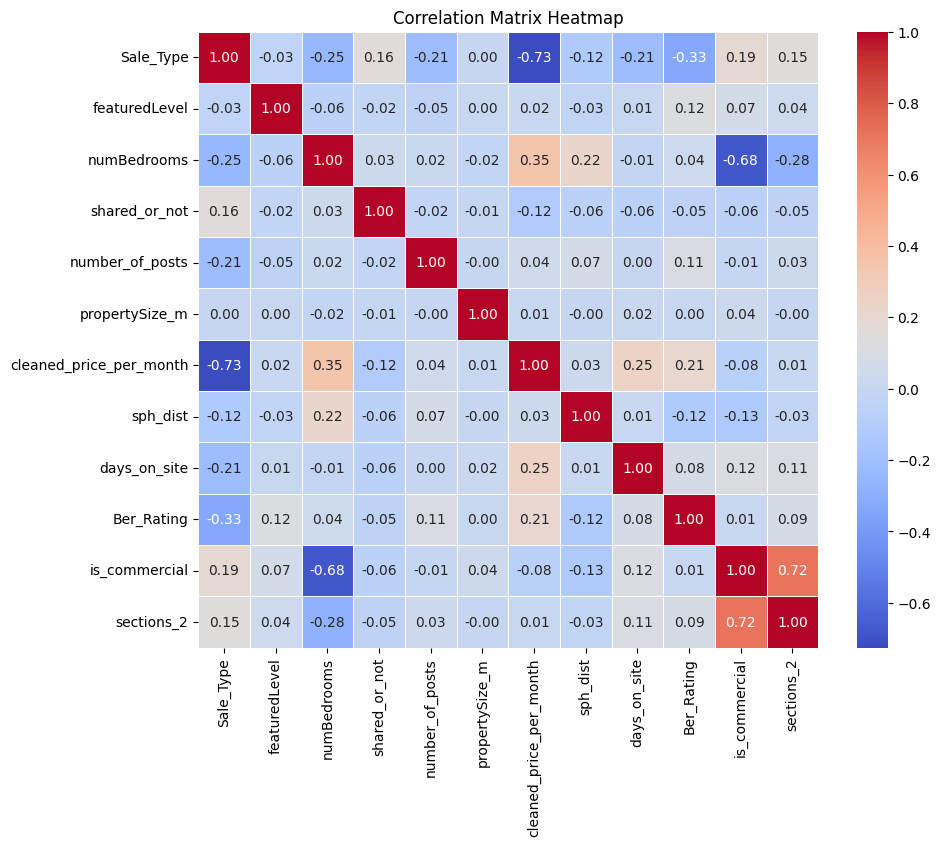

In [ ]:
correlation_matrix = initial_data5.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#PCA


In [ ]:
from sklearn.decomposition import PCA
pca_data5 = initial_data5.drop(columns=["cleaned_price_per_month"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data5)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained Variance Ratio": pca.explained_variance_ratio_,
    "Cumulative Explained Variance": np.cumsum(pca.explained_variance_ratio_)
})

explained_variance
#PC1-6 variables explain 81% of variance
#PC1-7 variables explain 88% of variance
#PC1-8 variables explain 95% of variance

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.208471,0.208471
1,PC2,0.143611,0.352082
2,PC3,0.103628,0.455710
3,PC4,0.093797,0.549507
4,PC5,0.090926,0.640433
5,PC6,0.088105,0.728538
6,PC7,0.084383,0.812921
7,PC8,0.072181,0.885102
8,PC9,0.056586,0.941688
9,PC10,0.046066,0.987754


In [ ]:
components = pca.components_

pc_contributions = pd.DataFrame(
    components,
    columns=pca_data5.columns,
    index=[f"PC{i+1}" for i in range(len(components))]
)

pc_contributions
#So, PC1 - 	is_commercial, PC2 - Sale_Type, PC3 - Ber_Rating, PC4 - number_of_posts, PC5 - propertySize_m, PC6 - days_on_site/featuredLevel, PC7 - shared_or_not, PC8 - sections_2/numBedrooms


,Sale_Type,featuredLevel,numBedrooms,shared_or_not,number_of_posts,propertySize_m,sph_dist,days_on_site,Ber_Rating,is_commercial,sections_2
PC1,0.265725,0.069883,-0.516872,-0.018767,-0.056737,0.026225,-0.184218,0.056312,-0.022316,0.612789,0.489873
PC2,0.574006,-0.148647,-0.028626,0.292483,-0.317377,-0.022013,-0.050116,-0.376327,-0.515849,-0.125724,-0.186553
PC3,-0.002026,-0.422272,0.065709,-0.268546,0.200420,0.015134,0.655912,0.157196,-0.441168,0.118415,0.203147
PC4,-0.015750,-0.436554,-0.064518,0.392004,0.664078,-0.278026,-0.169368,-0.286461,0.138164,0.029219,0.048544
PC5,-0.017667,-0.274946,-0.023588,0.190829,0.103065,0.914673,-0.143928,0.119835,0.018491,-0.005041,-0.066552
PC6,-0.051718,-0.498634,0.044686,0.183041,-0.338459,-0.284193,-0.299402,0.652894,-0.023059,-0.024461,-0.028734
PC7,0.020978,0.374750,0.172665,0.748953,0.018339,0.001159,0.389284,0.265507,0.001089,0.043091,0.210113
PC8,0.018004,-0.344568,0.310736,0.032885,-0.444973,0.046432,0.190145,-0.378870,0.496791,0.047342,0.392955
PC9,0.336201,0.140886,0.614219,-0.192997,0.252779,0.034495,-0.378357,0.128531,-0.155785,-0.108995,0.437832
PC10,0.692403,-0.029691,-0.126079,-0.138337,0.164424,-0.012257,0.251791,0.277223,0.496329,-0.144785,-0.223434


In [ ]:
#data according to PCA is as following:
regression_data = initial_data5.copy()
regression_data = regression_data[['cleaned_price_per_month', 'is_commercial', 'Sale_Type', 'sph_dist', 'number_of_posts', 'propertySize_m', 'featuredLevel', 'shared_or_not', 'numBedrooms']]
regression_data

,cleaned_price_per_month,is_commercial,Sale_Type,sph_dist,number_of_posts,propertySize_m,featuredLevel,shared_or_not,numBedrooms
3,330000.0,0,0,3.40,61,68.0,4,0,2
5,770000.0,0,0,14.57,36,121.0,4,0,4
6,1495000.0,0,0,9.85,38,234.0,4,0,4
7,550000.0,0,0,9.04,49,83.0,4,0,2
8,495000.0,0,0,9.13,49,68.0,4,0,2
...,...,...,...,...,...,...,...,...,...
16591,100000.0,1,0,0.96,16,60.0,4,0,0
16593,825000.0,1,0,1.60,16,260.0,4,0,0
16594,119000.0,1,0,9.18,16,110.0,4,0,0
16602,595000.0,1,0,7.99,27,313.0,4,0,0


In [ ]:
regression_data = regression_data[~(regression_data['cleaned_price_per_month'] < 100)]
regression_data[regression_data['cleaned_price_per_month'] < 100]

,cleaned_price_per_month,is_commercial,Sale_Type,sph_dist,number_of_posts,propertySize_m,featuredLevel,shared_or_not,numBedrooms


#Models with PCA

linear

In [ ]:
result_dict = {}
#all data, setting the parametres
pred_data_new1 = regression_data.copy()
X = pred_data_new1.drop('cleaned_price_per_month', axis=1)
y = pred_data_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#assuming linear dependencies define the model parameteres as follows: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}

svr = SVR(kernel='linear', C=100, gamma='scale', epsilon=0.5)
svr.fit(X_train_scaled, y_train)
inputs = {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}
result_dict['all_data_liner'] = {}
result_dict['all_data_liner']['parameters'] = inputs

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result_dict['all_data_liner']['MAPE'] = mape
result_dict['all_data_liner']['MSE'] = mse
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.2f}")
result_dict['all_data_liner']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 86596894573.64
Mean Absolute Percentage Error (MAPE): 8.50%
R-squared: 0.47
             Actual      Predicted
16452  1.200000e+03   27485.380196
6961   5.700000e+05  418604.663855
5586   4.150000e+05  415218.144402
5284   4.350000e+05  386928.099944
3536   1.300000e+03    2255.887553
5558   2.790000e+05  357029.834321
765    8.950000e+05  448650.701515
6225   5.342466e+03      55.455297
12752  8.000000e+02   23041.493313
49     1.195000e+06  521321.335744


In [ ]:
result_dict

{'all_data_liner': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'},
  'MAPE': 8.503519678557975,
  'MSE': 86596894573.63557,
  'R^2': 0.4691466393249356}}

non-linear

In [ ]:

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
inputs = {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
result_dict['all_data_rbf'] = {}
result_dict['all_data_rbf']['parameters'] = inputs

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.2f}")
result_dict['all_data_rbf']['MAPE'] = mape
result_dict['all_data_rbf']['MSE'] = mse
result_dict['all_data_rbf']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 166841397840.17
Mean Absolute Percentage Error (MAPE): 10.56%
R-squared: -0.02
             Actual      Predicted
16452  1.200000e+03   11311.814372
6961   5.700000e+05  190467.789348
5586   4.150000e+05  192602.299572
5284   4.350000e+05  126034.908128
3536   1.300000e+03    4204.709566
5558   2.790000e+05  119337.055889
765    8.950000e+05  174423.950914
6225   5.342466e+03   11328.606277
12752  8.000000e+02    8213.674042
49     1.195000e+06  128119.337199


In [ ]:
result_dict

{'all_data_liner': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'},
  'MAPE': 8.503519678557975,
  'MSE': 86596894573.63557,
  'R^2': 0.4691466393249356},
 'all_data_rbf': {'parameters': {'C': 100, 'epsilon': 0.1, 'gamma': 0.1},
  'MAPE': 10.562856298676717,
  'MSE': 166841397840.17416,
  'R^2': -0.02276550653753473}}

#RidgeRegression

##for all types of property

In [ ]:
result_dict = {}
#all data, setting the parametres
pred_data_new1 = regression_data.copy()

X = pred_data_new1.drop('cleaned_price_per_month', axis=1)
y = pred_data_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge
# Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
best_alpha = ridge_cv.best_params_['alpha']
inputs = {'best_ridge': best_ridge, 'best_alpha': best_alpha}
result_dict['all_data_ridge'] = {}
result_dict['all_data_ridge']['parameters'] = inputs
y_pred = best_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['all_data_ridge']['MAPE'] = mape
result_dict['all_data_ridge']['MSE'] = mse
result_dict['all_data_ridge']['R^2'] = r2

Best Alpha: 0.001
Mean Squared Error: 62510926797.94
R-squared: 0.62
Mean Absolute Percentage Error (MAPE): 46.55%


##for to_let

In [ ]:
to_let_new1 = pred_data_new1[pred_data_new1['Sale_Type'] == 1]
for_sale_new1 = pred_data_new1[pred_data_new1['Sale_Type'] == 0]

In [ ]:
X = to_let_new1.drop('cleaned_price_per_month', axis=1)
y = to_let_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
best_alpha = ridge_cv.best_params_['alpha']
inputs = {'best_ridge': best_ridge, 'best_alpha': best_alpha}
result_dict['to_let_ridge'] = {}
result_dict['to_let_ridge']['parameters'] = inputs

y_pred = best_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['to_let_ridge']['MAPE'] = mape
result_dict['to_let_ridge']['MSE'] = mse
result_dict['to_let_ridge']['R^2'] = r2

Best Alpha: 0.001
Mean Squared Error: 52575445.91
R-squared: -1.89
Mean Absolute Percentage Error (MAPE): 1.66%


##for for_sale

In [ ]:
X = for_sale_new1.drop('cleaned_price_per_month', axis=1)
y = for_sale_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
best_alpha = ridge_cv.best_params_['alpha']
inputs = {'best_ridge': best_ridge, 'best_alpha': best_alpha}
result_dict['for_sale_ridge'] = {}
result_dict['for_sale_ridge']['parameters'] = inputs
y_pred = best_ridge.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['for_sale_ridge']['MAPE'] = mape
result_dict['for_sale_ridge']['MSE'] = mse
result_dict['for_sale_ridge']['R^2'] = r2

Best Alpha: 0.001
Mean Squared Error: 97730982986.30
R-squared: 0.39
Mean Absolute Percentage Error (MAPE): 0.55%


#EnsembleRegressors



##All types

In [ ]:

pred_data_new1 = regression_data.copy()
X = pred_data_new1.drop('cleaned_price_per_month', axis=1)
y = pred_data_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

inputs_rf = {'n_estimators': 100}
result_dict['all_data_rf'] = {}
result_dict['all_data_rf']['parameters'] = inputs_rf

inputs_rb = {'n_estimators': 100, 'learning_rate': 0.1}
result_dict['all_data_gb'] = {}
result_dict['all_data_gb']['parameters'] = inputs_rb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}, Random Forest MAPE: {mape_rf:.2f}%")
print(f"Gradient Boosting MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}, Gradient Boosting MAPE: {mape_gb:.2f}%")
result_dict['all_data_rf']['MAPE'] = mape_rf
result_dict['all_data_rf']['MSE'] = mse_rf
result_dict['all_data_rf']['R^2'] = r2_rf

result_dict['all_data_gb']['MAPE'] = mape_gb
result_dict['all_data_gb']['MSE'] = mse_gb
result_dict['all_data_gb']['R^2'] = r2_gb

Random Forest MSE: 28168030904.25, R2: 0.83, Random Forest MAPE: 257.11%
Gradient Boosting MSE: 27700061894.70, R2: 0.83, Gradient Boosting MAPE: 691.02%


##to_let type

In [ ]:
to_let_new1 = pred_data_new1[pred_data_new1['Sale_Type'] == 1]
for_sale_new1 = pred_data_new1[pred_data_new1['Sale_Type'] == 0]

In [ ]:

X = to_let_new1.drop('cleaned_price_per_month', axis=1)
y = to_let_new1['cleaned_price_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

inputs_rf = {'n_estimators': 100}
result_dict['to_let_rf'] = {}
result_dict['to_let_rf']['parameters'] = inputs_rf

inputs_rb = {'n_estimators': 100, 'learning_rate': 0.1}
result_dict['to_let_gb'] = {}
result_dict['to_let_gb']['parameters'] = inputs_rb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

result_dict['to_let_rf']['MAPE'] = mape_rf
result_dict['to_let_rf']['MSE'] = mse_rf
result_dict['to_let_rf']['R^2'] = r2_rf

result_dict['to_let_gb']['MAPE'] = mape_gb
result_dict['to_let_gb']['MSE'] = mse_gb
result_dict['to_let_gb']['R^2'] = r2_gb

Random Forest MSE: 16789536.14, R2: 0.08, Random Forest MAPE: 49.79%
Gradient Boosting MSE: 8882175.01, R2: 0.51, Gradient Boosting MAPE: 54.05%


##for_sale type

In [ ]:

X = for_sale_new1.drop('cleaned_price_per_month', axis=1)
y = for_sale_new1['cleaned_price_per_month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

inputs_rf = {'n_estimators': 100}
result_dict['for_sale_rf'] = {}
result_dict['for_sale_rf']['parameters'] = inputs_rf

inputs_rb = {'n_estimators': 100, 'learning_rate': 0.1}
result_dict['for_sale_gb'] = {}
result_dict['for_sale_gb']['parameters'] = inputs_rb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

result_dict['for_sale_rf']['MAPE'] = mape_rf
result_dict['for_sale_rf']['MSE'] = mse_rf
result_dict['for_sale_rf']['R^2'] = r2_rf

result_dict['for_sale_gb']['MAPE'] = mape_gb
result_dict['for_sale_gb']['MSE'] = mse_gb
result_dict['for_sale_gb']['R^2'] = r2_gb

Random Forest MSE: 61747108660.75, R2: 0.61, Random Forest MAPE: 37.51%
Gradient Boosting MSE: 54535676858.00, R2: 0.66, Gradient Boosting MAPE: 37.94%


In [ ]:
result_pca_models = pd.DataFrame.from_dict(result_dict)

In [ ]:
result_pca_models

,all_data_ridge,to_let_ridge,for_sale_ridge,all_data_rf,all_data_rb,all_data_gb,to_let_rf,to_let_gb,for_sale_rf,for_sale_gb
parameters,"{'best_ridge': Ridge(alpha=0.001), 'best_alpha...","{'best_ridge': Ridge(alpha=0.001), 'best_alpha...","{'best_ridge': Ridge(alpha=0.001), 'best_alpha...",{'n_estimators': 100},"{'n_estimators': 100, 'learning_rate': 0.1}","{'n_estimators': 100, 'learning_rate': 0.1}",{'n_estimators': 100},"{'n_estimators': 100, 'learning_rate': 0.1}",{'n_estimators': 100},"{'n_estimators': 100, 'learning_rate': 0.1}"
MAPE,46.553155,1.663796,0.550687,2.571107,NaN,6.91016,0.497895,0.540485,0.375127,0.379377
MSE,62510926797.937248,52575445.907618,97730982986.300201,28168030904.247623,NaN,27700061894.695435,16789536.144212,8882175.006579,61747108660.754356,54535676857.995308
R^2,0.616798,-1.888815,0.38537,0.827325,NaN,0.830194,0.077481,0.511959,0.611672,0.657025


#Not-needed

In [ ]:
result_dict = {}
#rr = {'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}
#result_dict['all_data_liner'] = {}
#result_dict['all_data_liner']['parameters'] = rr
#result_dict['all_data_liner']['MAPE'] = 0.12
#result_dict

In [ ]:
#all data, setting the parametres
pred_data1 = initial_data5.copy()
# Step 4: Define the features (X) and target (y)
X = pred_data1.drop('cleaned_price_per_month', axis=1)
y = pred_data1['cleaned_price_per_month']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (SVR requires scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#linear
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['all_data_liner'] = {}
result_dict['all_data_liner']['parameters'] = grid_search.best_params_
print(grid_search.best_params_)


{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}


In [ ]:
#SVR all data and vars linear model
# Step 7: Train the SVR model
svr = SVR(kernel='linear', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], epsilon=grid_search.best_params_['epsilon'])
svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result_dict['all_data_liner']['MAPE'] = mape
result_dict['all_data_liner']['MSE'] = mse
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['all_data_liner']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 90310309093.08
Mean Absolute Percentage Error (MAPE): 6.36%
             Actual      Predicted
1009   6.199500e+05  431815.974289
5423   2.650000e+05  376117.962300
1646   4.250000e+05  424825.884199
15979  2.495000e+03  -27268.056662
7852   8.571429e+02   21468.797851
3556   1.899000e+03  -24990.099928
13825  3.250000e+05  381211.084761
16177  9.960000e+02  -12237.130422
7822   1.850000e+06  470939.256276
10311  7.500000e+02   13034.328090


In [ ]:
result_dict

{'all_data_liner': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'},
  'MAPE': 6.361951679805679,
  'MSE': 90310309093.0814,
  'R^2': 0.46374336219919166}}

In [ ]:
#rbf
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['all_data_rbf'] = {}
result_dict['all_data_rbf']['parameters'] = grid_search.best_params_


print(grid_search.best_params_)

{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}


In [ ]:
#SVR all data and vars non-linear model
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr = SVR(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], epsilon=grid_search.best_params_['epsilon'])
svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['all_data_rbf']['MAPE'] = mape
result_dict['all_data_rbf']['MSE'] = mse
result_dict['all_data_rbf']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 192413279406.64
Mean Absolute Percentage Error (MAPE): 11.62%
             Actual      Predicted
1009   6.199500e+05  151425.204416
5423   2.650000e+05  101847.198799
1646   4.250000e+05  151270.271880
15979  2.495000e+03   19876.218962
7852   8.571429e+02   15731.200621
3556   1.899000e+03    9395.510150
13825  3.250000e+05   94791.904733
16177  9.960000e+02   36608.758520
7822   1.850000e+06  139869.854416
10311  7.500000e+02   18220.831329


In [ ]:
to_let = pred_data1[pred_data1['Sale_Type'] == 1]
for_sale = pred_data1[pred_data1['Sale_Type'] == 0]

## To Let

In [ ]:
to_let

,Sale_Type,featuredLevel,numBedrooms,shared_or_not,number_of_posts,propertySize_m,cleaned_price_per_month,sph_dist,days_on_site,Ber_Rating,is_commercial,sections_2
21,1,4,3,0,1,10.0,750.000000,0.65,254,8.0,0,6
77,1,3,2,0,1,10.0,1217.142857,2.64,179,8.0,0,0
104,1,4,2,0,54,103.0,2800.000000,6.54,158,8.0,0,2
105,1,4,2,0,54,154.0,5000.000000,12.81,158,7.0,0,2
154,1,4,0,0,16,51.0,2500.000000,0.99,132,8.0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
16566,1,4,3,0,2,20.0,950.000000,0.76,-1,6.0,0,6
16567,1,4,3,0,2,20.0,1150.000000,14.00,-1,8.0,0,6
16568,1,4,3,0,2,20.0,700.000000,7.04,-1,2.0,0,6
16569,1,4,3,0,3,20.0,790.000000,6.38,-1,8.0,0,6


In [ ]:
#to let, setting the parametres

# Step 4: Define the features (X) and target (y)
X = to_let.drop('cleaned_price_per_month', axis=1)
y = to_let['cleaned_price_per_month']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (SVR requires scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['to_let_data_liner'] = {}
result_dict['to_let_data_liner']['parameters'] = grid_search.best_params_
params_to_let_liner = grid_search.best_params_
print(grid_search.best_params_)

{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}


In [ ]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['to_let_data_rbf'] = {}
result_dict['to_let_data_rbf']['parameters'] = grid_search.best_params_
params_to_let_rbf = grid_search.best_params_
print(grid_search.best_params_)

{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}


In [ ]:
#SVR to_let data and all vars linear model
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
#svr = SVR(kernel='linear', C=100, gamma='scale', epsilon=0.2)
svr = SVR(kernel='linear', C=params_to_let_liner['C'], gamma=params_to_let_liner['gamma'], epsilon=params_to_let_liner['epsilon'])
svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['to_let_data_liner']['MAPE'] = mape
result_dict['to_let_data_liner']['MSE'] = mse
result_dict['to_let_data_liner']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 19868069.60
Mean Absolute Percentage Error (MAPE): 0.71%
            Actual    Predicted
6222   2054.794521  1974.565608
10352   857.142857  1041.495918
3124    700.000000   875.204760
16096   790.000000   834.514585
15618   425.000000  1642.723038
9760    260.000000  1825.587483
13499  1200.000000   914.857896
11816   980.000000   929.345846
2531    950.000000   941.504608
2625   1000.000000   775.070086


In [ ]:
#SVR to_let data and all vars rbf model
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
#svr = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.2)
#svr = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.2)
svr = SVR(kernel='rbf', C=params_to_let_rbf['C'], gamma=params_to_let_rbf['gamma'], epsilon=params_to_let_rbf['epsilon'])

svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['to_let_data_rbf']['MAPE'] = mape
result_dict['to_let_data_rbf']['MSE'] = mse
result_dict['to_let_data_rbf']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 7897473.58
Mean Absolute Percentage Error (MAPE): 0.43%
            Actual    Predicted
6222   2054.794521  2489.826589
10352   857.142857   800.789020
3124    700.000000   697.036768
16096   790.000000   839.171652
15618   425.000000  1598.304055
9760    260.000000  1824.457422
13499  1200.000000   784.979966
11816   980.000000   794.329875
2531    950.000000   843.137567
2625   1000.000000   828.130700


## For sale

In [ ]:
#for sale, setting the parametres
# Step 4: Define the features (X) and target (y)
X = for_sale.drop('cleaned_price_per_month', axis=1)
y = for_sale['cleaned_price_per_month']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (SVR requires scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
for_sale.isna().sum()

,0
Sale_Type,0
featuredLevel,0
numBedrooms,0
shared_or_not,0
number_of_posts,0
propertySize_m,0
cleaned_price_per_month,0
sph_dist,0
days_on_site,0
Ber_Rating,0


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['for_sale_liner'] = {}
result_dict['for_sale_liner']['parameters'] = grid_search.best_params_
params_for_sale_liner = grid_search.best_params_
print(grid_search.best_params_)

{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
result_dict['for_sale_rbf'] = {}
result_dict['for_sale_rbf']['parameters'] = grid_search.best_params_
params_for_sale_rbf = grid_search.best_params_
print(grid_search.best_params_)

{'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}


In [ ]:
#SVR for_sale data and all vars linear model
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
#svr = SVR(kernel='linear', C=100, gamma='scale', epsilon=0.5)
svr = SVR(kernel='linear', C=params_for_sale_liner['C'], gamma=params_for_sale_liner['gamma'], epsilon=params_for_sale_liner['epsilon'])
svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['for_sale_liner']['MAPE'] = mape
result_dict['for_sale_liner']['MSE'] = mse
result_dict['for_sale_liner']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 125949316233.85
Mean Absolute Percentage Error (MAPE): 0.29%
         Actual      Predicted
5182   825000.0  528245.590458
1841   449950.0  365830.136957
13226  745000.0  583556.520601
14149  275000.0  387000.348895
4523   550000.0  534593.753288
14133  259000.0  241218.507278
1866   319950.0  359988.948621
3072   270000.0  438143.237576
2535   450000.0  521447.979782
2440   359000.0  529114.782215


In [ ]:
#SVR for_sale data and all vars rbf model
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.5)
svr = SVR(kernel='rbf', C=params_for_sale_rbf['C'], gamma=params_for_sale_rbf['gamma'], epsilon=params_for_sale_rbf['epsilon'])
svr.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
r2 = r2_score(y_test, y_pred)
result_dict['for_sale_rbf']['MAPE'] = mape
result_dict['for_sale_rbf']['MSE'] = mse
result_dict['for_sale_rbf']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 168345867354.21
Mean Absolute Percentage Error (MAPE): 0.39%
         Actual      Predicted
5182   825000.0  478245.420627
1841   449950.0  452231.048502
13226  745000.0  487907.957580
14149  275000.0  455329.076366
4523   550000.0  470388.144117
14133  259000.0  454740.129325
1866   319950.0  451389.275428
3072   270000.0  465287.132740
2535   450000.0  469659.674421
2440   359000.0  474249.381365


In [ ]:
print(result_dict)

{'all_data_liner': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}, 'MAPE': 6.361951679805679, 'MSE': 90310309093.0814, 'R^2': 0.46374336219919166}, 'all_data_rbf': {'parameters': {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}, 'MAPE': 11.619466369354942, 'MSE': 192413279406.64426, 'R^2': -0.1425373173785245}, 'to_let_data_liner': {'parameters': {'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}, 'MAPE': 0.7093050741597724, 'MSE': 19868069.598126937, 'R^2': -1.180059268480349}, 'to_let_data_rbf': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}, 'MAPE': 0.4281795990140983, 'MSE': 7897473.583597155, 'R^2': 0.13343566678854268}, 'for_sale_liner': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}, 'MAPE': 0.2874530973502891, 'MSE': 125949316233.85272, 'R^2': 0.20553577733617845}, 'for_sale_rbf': {'parameters': {'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}, 'MAPE': 0.3857429191060806, 'MSE': 168345867354.21323, 'R^2': -0.061893566757481366}}


In [ ]:
result = pd.DataFrame.from_dict(result_dict)
result.to_csv('/content/drive/MyDrive/Daft/result_DMML.csv')

In [ ]:
result

,all_data_liner,all_data_rbf,to_let_data_liner,to_let_data_rbf,for_sale_liner,for_sale_rbf
parameters,"{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}","{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}"
MAPE,6.361952,11.619466,0.709305,0.42818,0.287453,0.385743
MSE,90310309093.081406,192413279406.644257,19868069.598127,7897473.583597,125949316233.852722,168345867354.213226
R^2,0.463743,-0.142537,-1.180059,0.133436,0.205536,-0.061894


In [ ]:
#now with scaler

In [ ]:
#for sale, setting the parametres

# Step 4: Define the features (X) and target (y)
X = for_sale.drop('cleaned_price_per_month', axis=1)
y = for_sale['cleaned_price_per_month']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (SVR requires scaled data)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)
result_dict['for_sale_rbf_StandardScaler'] = {}
result_dict['for_sale_rbf_StandardScaler']['parameters'] = grid_search.best_params_
params_for_sale_rbf = grid_search.best_params_
print(grid_search.best_params_)

{'C': 10, 'epsilon': 0.2, 'gamma': 'scale'}


In [ ]:
#SVR for_sale data and all vars rbf model, scaled
# Step 7: Train the SVR model
svr = SVR(kernel='rbf', C=params_for_sale_rbf['C'], gamma=params_for_sale_rbf['gamma'], epsilon=params_for_sale_rbf['epsilon'])
svr.fit(X_train_scaled, y_train_scaled)

# Step 8: Make predictions
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['for_sale_rbf_StandardScaler']['MAPE'] = mape
result_dict['for_sale_rbf_StandardScaler']['MSE'] = mse
result_dict['for_sale_rbf_StandardScaler']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 57262472556.20
Mean Absolute Percentage Error (MAPE): 0.24%
         Actual      Predicted
5182   825000.0  650005.150343
1841   449950.0  378868.660492
13226  745000.0  656084.158027
14149  275000.0  345734.274921
4523   550000.0  659468.209844
14133  259000.0  321720.214674
1866   319950.0  326095.577246
3072   270000.0  324794.684932
2535   450000.0  620826.439289
2440   359000.0  453709.955960


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)
result_dict['for_sale_liner_StandardScaler'] = {}
result_dict['for_sale_liner_StandardScaler']['parameters'] = grid_search.best_params_
params_for_sale_liner = grid_search.best_params_
print(grid_search.best_params_)

{'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}


In [ ]:
#SVR for_sale data and all vars linear model, scaled
# Step 7: Train the SVR model
#svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr = SVR(kernel='linear', C=params_for_sale_liner['C'], gamma=params_for_sale_liner['gamma'], epsilon=params_for_sale_liner['epsilon'])
svr.fit(X_train_scaled, y_train_scaled)

# Step 8: Make predictions
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['for_sale_liner_StandardScaler']['MAPE'] = mape
result_dict['for_sale_liner_StandardScaler']['MSE'] = mse
result_dict['for_sale_liner_StandardScaler']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 111832111056.97
Mean Absolute Percentage Error (MAPE): 0.33%
         Actual      Predicted
5182   825000.0  621218.325382
1841   449950.0  420178.928402
13226  745000.0  757404.363482
14149  275000.0  379036.298982
4523   550000.0  654941.165129
14133  259000.0   18148.573566
1866   319950.0  492101.911745
3072   270000.0  397787.534524
2535   450000.0  707747.635245
2440   359000.0  608552.462673


In [ ]:
result = pd.DataFrame.from_dict(result_dict)
result.to_csv('/content/drive/MyDrive/Daft/result_DMML.csv')
result

,all_data_liner,all_data_rbf,to_let_data_liner,to_let_data_rbf,for_sale_liner,for_sale_rbf,for_sale_rbf_StandardScaler,for_sale_liner_StandardScaler
parameters,"{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}","{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}","{'C': 10, 'epsilon': 0.2, 'gamma': 'scale'}","{'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}"
MAPE,6.361952,11.619466,0.709305,0.42818,0.287453,0.385743,0.236985,0.330733
MSE,90310309093.081406,192413279406.644257,19868069.598127,7897473.583597,125949316233.852722,168345867354.213226,57262472556.197083,111832111056.973114
R^2,0.463743,-0.142537,-1.180059,0.133436,0.205536,-0.061894,0.638799,0.294584


## Lasso

In [ ]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train_scaled, y_train_scaled)
result_dict['for_sale_Lasso_StandardScaler'] = {}
result_dict['for_sale_Lasso_StandardScaler']['parameters'] = lasso_regressor.best_params_
params_for_sale_Lasso = lasso_regressor.best_params_
print(lasso_regressor.best_params_)

{'alpha': 0.1}


In [ ]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
#y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

lasso = Lasso(params_for_sale_Lasso['alpha'])
lasso.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = lasso.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
result_dict['for_sale_Lasso_StandardScaler']['MAPE'] = mape
result_dict['for_sale_Lasso_StandardScaler']['MSE'] = mse
result_dict['for_sale_Lasso_StandardScaler']['R^2'] = r2
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

Mean Squared Error: 107043684615.44
Mean Absolute Percentage Error (MAPE): 0.37%
         Actual      Predicted
5182   825000.0  638138.925488
1841   449950.0  422025.539268
13226  745000.0  747322.155791
14149  275000.0  530792.165387
4523   550000.0  730385.038061
14133  259000.0  245536.481564
1866   319950.0  435753.897734
3072   270000.0  511409.444366
2535   450000.0  753826.765443
2440   359000.0  605859.466819


In [ ]:
result = pd.DataFrame.from_dict(result_dict)
result.to_csv('/content/drive/MyDrive/Daft/result_DMML.csv', index =  False)
result

,all_data_liner,all_data_rbf,to_let_data_liner,to_let_data_rbf,for_sale_liner,for_sale_rbf,for_sale_rbf_StandardScaler,for_sale_liner_StandardScaler,for_sale_Lasso_StandardScaler
parameters,"{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}","{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}","{'C': 10, 'epsilon': 0.2, 'gamma': 'scale'}","{'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}",{'alpha': 0.1}
MAPE,6.361952,11.619466,0.709305,0.42818,0.287453,0.385743,0.236985,0.330733,0.370328
MSE,90310309093.081406,192413279406.644257,19868069.598127,7897473.583597,125949316233.852722,168345867354.213226,57262472556.197083,111832111056.973114,107043684615.44101
R^2,0.463743,-0.142537,-1.180059,0.133436,0.205536,-0.061894,0.638799,0.294584,0.324789


In [ ]:
result = pd.read_csv('/content/drive/MyDrive/Daft/result_DMML.csv')

In [ ]:
result.set_index('Unnamed: 0', inplace=True)

In [ ]:
result

,all_data_liner,all_data_rbf,to_let_data_liner,to_let_data_rbf,for_sale_liner,for_sale_rbf,for_sale_rbf_StandardScaler,for_sale_liner_StandardScaler,for_sale_Lasso_StandardScaler
Unnamed: 0,,,,,,,,,
parameters,"{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}","{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}","{'C': 100, 'epsilon': 0.5, 'gamma': 'auto'}","{'C': 10, 'epsilon': 0.2, 'gamma': 'scale'}","{'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}",{'alpha': 0.1}
MAPE,6.361951679805679,11.619466369354942,0.7093050741597724,0.4281795990140983,0.2874530973502891,0.3857429191060806,0.2369851532612811,0.33073260889908807,0.37032839286672736
MSE,90310309093.0814,192413279406.64426,19868069.598126937,7897473.583597155,125949316233.85272,168345867354.21323,57262472556.19708,111832111056.97311,107043684615.44101
R^2,0.46374336219919166,-0.1425373173785245,-1.180059268480349,0.13343566678854268,0.20553577733617845,-0.061893566757481366,0.6387992638030702,0.29458441032923943,0.3247888894356705


In [ ]:
data = result.loc['MAPE'].reset_index()
data['MAPE'] = data['MAPE'].astype(float)
data

,index,MAPE
0,all_data_liner,6.361952
1,all_data_rbf,11.619466
2,to_let_data_liner,0.709305
3,to_let_data_rbf,0.428180
4,for_sale_liner,0.287453
5,for_sale_rbf,0.385743
6,for_sale_rbf_StandardScaler,0.236985
7,for_sale_liner_StandardScaler,0.330733
8,for_sale_Lasso_StandardScaler,0.370328


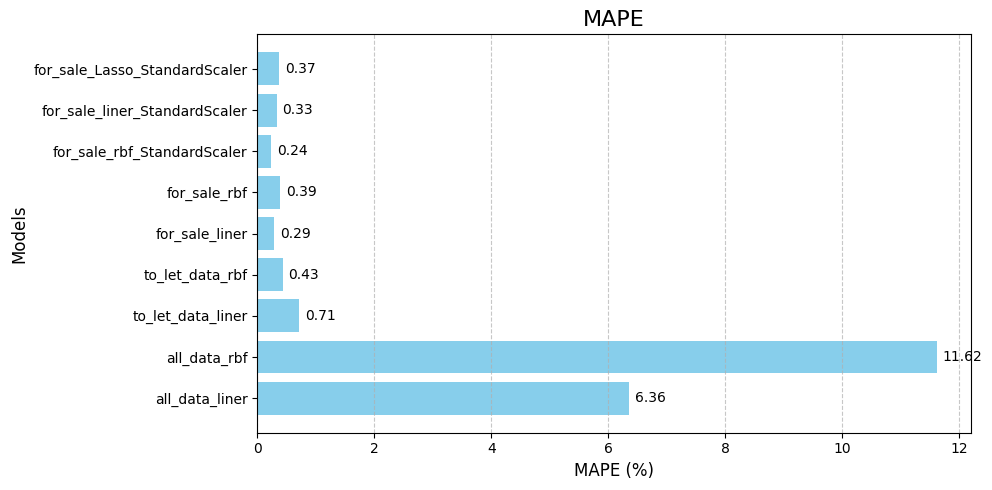

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(data['index'], round(data['MAPE'],2), color='skyblue')
plt.title("MAPE", fontsize=16)
plt.xlabel("MAPE (%)", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(data['MAPE']):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()
